# Predicting Energy Consumption based on various building features and environmental factors.

In [ ]:
# It contains data for multiple building types, square footage, the number of occupants, appliances used, average temperature, and the day of the week.
# The goal is to build a predictive model to estimate energy consumption using these attributes.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Testing and Training the data

In [185]:
df_test = pd.read_csv('test_energy_data.csv')
df_train = pd.read_csv('train_energy_data.csv')

In [187]:
df_test.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [189]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [191]:
df_test.shape , df_train.shape

((100, 7), (1000, 7))

In [193]:
df_test.info() , df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000

(None, None)

In [195]:
data = pd.concat([df_test , df_train] , axis=0)

In [197]:
data

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [199]:
data.shape

(1100, 7)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 68.8+ KB


In [203]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [205]:
data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [207]:
data['Building Type'].value_counts()

Building Type
Residential    387
Commercial     362
Industrial     351
Name: count, dtype: int64

<Axes: xlabel='Energy Consumption', ylabel='Count'>

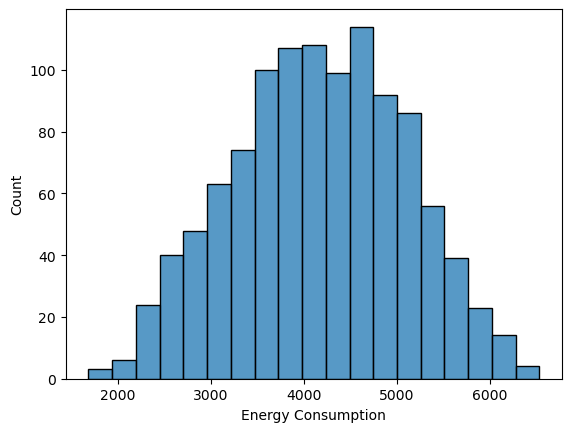

In [209]:
sns.histplot(data['Energy Consumption'])

In [211]:
data.groupby(['Day of Week']) [['Energy Consumption']].mean()

,Energy Consumption
Day of Week,
Weekday,4184.314719
Weekend,4152.009089


Numerical Features

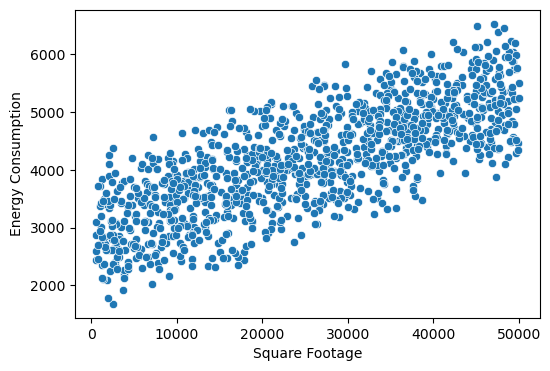

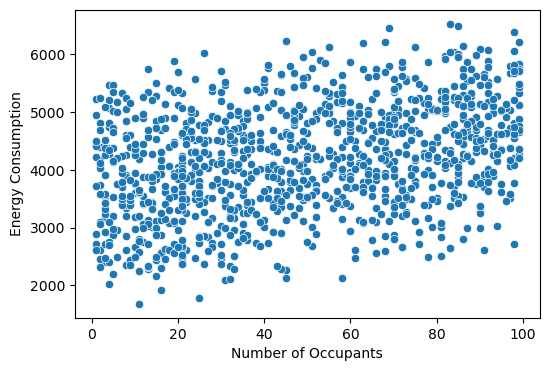

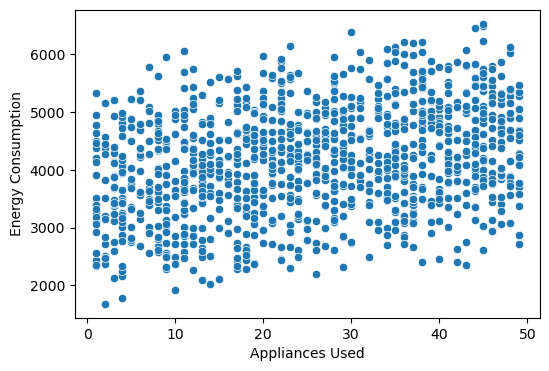

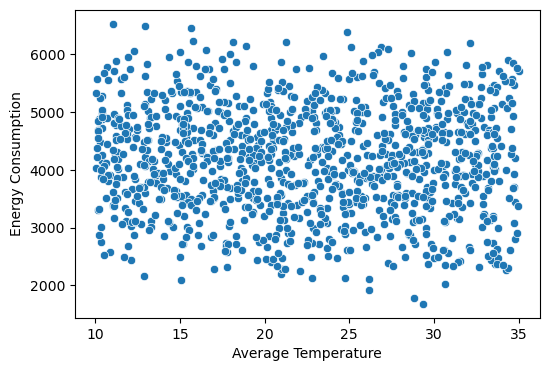

In [247]:
# List of numerical features in the dataset
numerical_features = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

# Plot scatter plots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y='Energy Consumption')
    plt.show()

In [213]:
data.groupby(['Building Type']) [['Average Temperature']].mean()

,Average Temperature
Building Type,
Commercial,22.124227
Industrial,22.736524
Residential,22.806796


Creating dummies

In [271]:
Final = pd.get_dummies(data,columns = ['Day of Week','Building Type']).astype(int)
Final

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Day of Week_Weekday,Day of Week_Weekend,Building Type_Commercial,Building Type_Industrial,Building Type_Residential
0,24563,15,4,28,2865,1,0,0,0,1
1,27583,56,23,23,4283,0,1,1,0,0
2,45313,4,44,33,5067,1,0,1,0,0
3,41625,84,17,27,4624,0,1,0,0,1
4,36720,58,47,17,4820,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,14419,68,44,23,3661,0,1,0,0,1
996,12194,7,22,14,3546,0,1,0,1,0
997,39562,88,20,32,5147,1,0,1,0,0
998,8348,67,37,16,3244,0,1,0,0,1


In [273]:
x = Final.drop('Energy Consumption',axis=1)
x

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week_Weekday,Day of Week_Weekend,Building Type_Commercial,Building Type_Industrial,Building Type_Residential
0,24563,15,4,28,1,0,0,0,1
1,27583,56,23,23,0,1,1,0,0
2,45313,4,44,33,1,0,1,0,0
3,41625,84,17,27,0,1,0,0,1
4,36720,58,47,17,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
995,14419,68,44,23,0,1,0,0,1
996,12194,7,22,14,0,1,0,1,0
997,39562,88,20,32,1,0,1,0,0
998,8348,67,37,16,0,1,0,0,1


In [275]:
y = Final['Energy Consumption']
y

0      2865
1      4283
2      5067
3      4624
4      4820
       ... 
995    3661
996    3546
997    5147
998    3244
999    3423
Name: Energy Consumption, Length: 1100, dtype: int32

Importing TestTrainSplit From sklearn

In [277]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Using Linear Regress

In [279]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [281]:
model.fit(x_train,y_train)

LinearRegression()

In [283]:
model.predict(x_test)

array([3534.55590656, 4276.96263356, 2841.33541102, 5708.98580709,
       4652.77038442, 4099.93891325, 2860.78885641, 4659.45612211,
       3780.02598975, 4364.98755246, 3707.7060965 , 5240.35463661,
       4210.08354578, 3512.25823244, 3878.93407846, 4142.82944257,
       5330.05658284, 3833.53752109, 2274.66858275, 3949.1316124 ,
       3776.31412907, 3559.51651913, 4628.19968995, 3511.46106174,
       5513.0286454 , 4287.41004966, 4896.62480506, 3312.98089055,
       4281.21841137, 4007.17731935, 3600.51740662, 4403.3913237 ,
       3698.1092669 , 3385.58309194, 4000.78183526, 5131.68732427,
       4448.23174502, 2344.41748759, 3054.496969  , 2787.48362516,
       4998.50161492, 5471.19547242, 3581.2303847 , 3420.30619448,
       3931.91162344, 4977.70848787, 3447.14299501, 5338.71394873,
       3161.62274894, 3984.07965736, 3193.980357  , 5244.91157135,
       4991.54076434, 5861.6373777 , 5329.82738637, 5347.90766177,
       4649.96441302, 3289.30290985, 3772.29353909, 6134.98858

In [287]:
model.predict(x_train)

array([3498.08384293, 3345.02488926, 5031.475404  , 6215.71678614,
       3702.4014138 , 5448.09369023, 4802.24165977, 4260.5479682 ,
       4489.44248447, 4797.656438  , 5963.28740203, 2918.16074087,
       3872.88431964, 3909.54423543, 4728.29928377, 2769.11578847,
       4922.02719566, 3593.88745653, 4135.56970934, 4634.76273462,
       4636.00339295, 5075.07274382, 3940.18264438, 5092.90931979,
       5043.61679771, 3902.7273797 , 4818.16870284, 4908.83010183,
       4034.78326781, 5051.22928947, 2239.36668578, 3392.59534082,
       2871.77611229, 2722.74996786, 3766.71648754, 5792.77522857,
       4921.08192903, 2961.5003765 , 4935.11995087, 5100.88904922,
       2521.03713424, 5445.23852249, 2327.49638899, 5437.56799981,
       3630.34563758, 6042.08151598, 4980.9111424 , 4249.63730341,
       1682.38934781, 3145.7429564 , 3204.35896394, 3410.48084015,
       4250.61178971, 4506.00603808, 3011.17751971, 3657.69082824,
       4415.23151452, 5018.92352687, 3932.59094001, 4192.57326

In [293]:
model.score(x_test , y_test)

0.9999973334106594